In [1]:
import numpy as np
import pandas as pd
import json
import csv
import time
from scipy import spatial
PATH_ROOT = "D:/Desktop/Northeastern_University/Research/Proteomics/ProteinProteinAssociation/Development"

## Load Util Functions

In [2]:
# original vector values are both nonzero
def find_common_observations(vector1,vector2):
  vector1_bool = np.where(vector1 != 0, 1, 0)
  vector2_bool = np.where(vector2 != 0, 1, 0)
  take_indices = np.logical_and(vector1_bool,vector2_bool)
  take_indices = take_indices.nonzero()[0]
  x1 = np.take(vector1,take_indices)
  x2 = np.take(vector2,take_indices)
  return x1,x2

# Appends list of tuples to csv
def append_to_csv(file_name,column_names,cor_tuples):
  with open(file_name, 'a+', newline='') as write_obj:
    csv_writer = writer(write_obj)
    if column_names is not None:
      csv_writer.writerow(column_names)
    for cor_tuple in cor_tuples:
      csv_writer.writerow(cor_tuple)

def write_json_to(json_dict,path):
  json_to_write = json.dumps(json_dict)
  write_file = open(path,"w")
  write_file.write(json_to_write)
  write_file.close()

def read_json_from(path):
  with open(path, "r") as read_file:
    return json.load(read_file)

def progress_report(cur_idx,total,start_time):
    percent_done = (cur_idx+1) / total
    print(f"Percent done: {percent_done}")
    time_since_start = time.time() - start_time
    print(f"Time elasped: {time_since_start}")
    print(f"Estimate finishing in: {time_since_start / (percent_done) - time_since_start}")    

def get_protein_vector(protein,feature_matrix):
    return feature_matrix[proteomeHD_protein_to_idx_lookup_path[protein]]

def generate_pair_distances(pairs_df,dist_function,column_names,feature_matrix,lookup_json,p1_index=0,p2_index=1):
    pair_df_copy = pairs_df.copy()
    dist_mat = np.zeros((len(pairs_df),len(column_names)))
    start_time = time.time()
    for idx,row in pairs_df.iterrows():
        protein1_vec = feature_matrix[lookup_json[row[p1_index]]]
        protein2_vec = feature_matrix[lookup_json[row[p2_index]]]
        dist = dist_function(protein1_vec,protein2_vec)
        dist_mat[idx] = dist
        if (idx % 10000 == 1):
            progress_report(idx,len(pairs_df),start_time)
    for idx,name in enumerate(column_names):
        pair_df_copy.insert(len(pairs_df.columns),name,dist_mat[:,idx])
    return pair_df_copy

## Define distance function here

In [15]:
def pearson_dist(vec1,vec2):
    return 1-np.corrcoef(vec1,vec2)[0,1]

def pearson_dist_wrapper(p1_vec,p2_vec):
    vec1,vec2 = find_common_observations(p1_vec,p2_vec)
    return pearson_dist(vec1,vec2)

def normalized_manhattan_dist(vec1,vec2):
    diff = np.where(vec1>=vec2, vec1,vec2) - np.where(vec1<vec2, vec1,vec2)
    normalizing_factor = np.sum(np.maximum(np.maximum(vec1,vec2),diff))
    if normalizing_factor == 0:
        return float('NaN')
    return np.sum(diff) / normalizing_factor

def normalized_manhattan_dist_wrapper(p1_vec,p2_vec):
    vec1,vec2 = find_common_observations(p1_vec,p2_vec)
    return normalized_manhattan_dist(vec1,vec2)

def euclidean_dist(vec1,vec2):
    return np.linalg.norm(vec1-vec2)

def euclidean_dist_wrapper(p1_vec,p2_vec):
    vec1,vec2 = find_common_observations(p1_vec,p2_vec)
    return euclidean_dist(vec1,vec2)

def cosine_dist(vec1,vec2):
    return spatial.distance.cosine(vec1, vec2)

def cosine_dist_wrapper(p1_vec,p2_vec):
    vec1,vec2 = find_common_observations(p1_vec,p2_vec)
    return cosine_dist(vec1,vec2)

###

def manhatthan_dist_vector(vec1,vec2):
    return np.abs(vec1-vec2)

def normalizied_manhatthan_dist_vector(vec1,vec2):
    diff = np.where(vec1>=vec2, vec1,vec2) - np.where(vec1<vec2, vec1,vec2)
    normalizing_factor = np.sum(np.maximum(np.maximum(vec1,vec2),diff))
    return diff / normalizing_factor

In [42]:
new_df = generate_pair_distances(corum_mixed_df_p_only,
                                 normalizied_manhatthan_dist_vector,
                                 ["n_mdist_vec_c1","n_mdist_vec_c2"],
                                 embedding_feature_matrix,
                                 proteomeHD_protein_to_idx_lookup
                                )

Percent done: 1.9128322350488252e-05
Time elasped: 0.008974552154541016
Estimate finishing in: 469.1671502590179
Percent done: 0.09566074007479174
Time elasped: 1.379309892654419
Estimate finishing in: 13.039456798634133
Percent done: 0.19130235182723299
Time elasped: 2.687838315963745
Estimate finishing in: 11.362372203095415
Percent done: 0.2869439635796742
Time elasped: 3.9656014442443848
Estimate finishing in: 9.854523554284386
Percent done: 0.3825855753321155
Time elasped: 5.239198446273804
Estimate finishing in: 8.454988643047981
Percent done: 0.47822718708455675
Time elasped: 6.8628926277160645
Estimate finishing in: 7.4878026339956385
Percent done: 0.573868798836998
Time elasped: 8.160417079925537
Estimate finishing in: 6.059587730343692
Percent done: 0.6695104105894393
Time elasped: 9.4040687084198
Estimate finishing in: 4.642118714028831
Percent done: 0.7651520223418805
Time elasped: 10.69761347770691
Estimate finishing in: 3.2834166513973795
Percent done: 0.8607936340943217


## Runs

In [25]:
proteomeHD_protein_to_idx_lookup_path = f"{PATH_ROOT}/data_sources/ProteomeHD/major_simplified_to_idx_lookup.json"
proteomeHD_protein_to_idx_lookup = read_json_from(proteomeHD_protein_to_idx_lookup_path)
# proteomeHD_df_path = f"{PATH_ROOT}/data_sources/ProteomeHD/ProteomeHD_v1_1.csv"
# proteomeHD_df = pd.read_csv(proteomeHD_df_path)
# proteomeHD_feature_matrix = proteomeHD_df.iloc[:,4:].fillna(0).to_numpy()
embedding_path = f"{PATH_ROOT}/embeddings/umap/numpy_files/cosine/n_15_minDist_5_com_2.npy"
embedding_feature_matrix = np.load(embedding_path)
corum_mixed_df_path = f"{PATH_ROOT}/data_sources/ProteomeHD/corum_validated/embeddings/umap/n_15_minDist_5_com_2.csv"
corum_mixed_df = pd.read_csv(corum_mixed_df_path)

In [26]:
corum_mixed_df

,protein1,protein2,is_validated,nman_dist,euclidean_dist
0,P09488,O75410,0,0.607814,7.194732
1,Q9Y6K9,Q69YQ0,0,0.498450,5.270504
2,Q6NUS8,Q13442,0,0.511141,7.670210
3,O14924,P09429,0,0.731423,9.351142
4,Q04323,P55212,0,0.701583,7.081311
...,...,...,...,...,...
104552,Q12802,Q16539,1,0.357582,3.113811
104553,Q12802,Q9NYL2,1,0.029753,0.250228
104554,Q16512,Q16539,1,0.131189,0.652087
104555,Q16512,Q9NYL2,1,0.372373,3.019304


In [28]:
new_df = generate_pair_distances(corum_mixed_df,
                                 cosine_dist_wrapper,
                                 ["cosine_dist"],
                                 embedding_feature_matrix,
                                 proteomeHD_protein_to_idx_lookup
                                )

Percent done: 1.9128322350488252e-05
Time elasped: 0.013961076736450195
Estimate finishing in: 729.850189089775
Percent done: 0.09566074007479174
Time elasped: 2.080845594406128
Estimate finishing in: 19.67150121766361
Percent done: 0.19130235182723299
Time elasped: 4.44286847114563
Estimate finishing in: 18.78145903298264
Percent done: 0.2869439635796742
Time elasped: 6.657196283340454
Estimate finishing in: 16.54313942085353
Percent done: 0.3825855753321155
Time elasped: 8.735257625579834
Estimate finishing in: 14.0969090550299
Percent done: 0.47822718708455675
Time elasped: 10.798599004745483
Estimate finishing in: 11.781880098873842
Percent done: 0.573868798836998
Time elasped: 12.865253448486328
Estimate finishing in: 9.553204349810144
Percent done: 0.6695104105894393
Time elasped: 14.891468048095703
Estimate finishing in: 7.350856809833246
Percent done: 0.7651520223418805
Time elasped: 16.95156764984131
Estimate finishing in: 5.2029417219801175
Percent done: 0.8607936340943217
Ti

In [21]:
new_df[new_df['is_validated'] == 0].describe()

,is_validated,nman_dist,euclidean_dist,cosine_dist,pearson_dist
count,100000.0,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,0.0,0.439716,4.342495,1.179264e-01,9.369400e-01
std,0.0,0.192218,2.109663,1.405450e-01,9.980147e-01
min,0.0,0.000000,0.000000,-1.192093e-07,0.000000e+00
25%,0.0,0.293495,2.707052,1.392658e-02,0.000000e+00
50%,0.0,0.438242,4.222924,6.256214e-02,1.110223e-16
75%,0.0,0.587109,5.862380,1.730561e-01,2.000000e+00
max,0.0,0.910419,10.614611,8.095767e-01,2.000000e+00


In [12]:
new_df[new_df['is_validated'] == 1].describe()

,is_validated,nman_dist,euclidean_dist,cosine_dist
count,4557.0,4557.000000,4557.000000,4557.000000
mean,1.0,0.413871,3.654942,0.104737
std,0.0,0.215660,2.296918,0.141376
min,1.0,0.004920,0.039013,0.000000
25%,1.0,0.235350,1.699334,0.006426
50%,1.0,0.414706,3.421262,0.040160
75%,1.0,0.593740,5.366708,0.147396
max,1.0,0.894573,10.139243,0.795743


In [30]:
new_df_path = corum_mixed_df_path
#new_df_path = f"{PATH_ROOT}/data_sources/ProteomeHD/corum_validated/embeddings/umap/n_15_minDist_5_com_2.csv"
new_df.to_csv(new_df_path,index=False)

In [29]:
new_df

,protein1,protein2,is_validated,nman_dist,euclidean_dist,cosine_dist
0,P09488,O75410,0,0.607814,7.194732,0.017188
1,Q9Y6K9,Q69YQ0,0,0.498450,5.270504,0.086424
2,Q6NUS8,Q13442,0,0.511141,7.670210,0.236808
3,O14924,P09429,0,0.731423,9.351142,0.498939
4,Q04323,P55212,0,0.701583,7.081311,0.386560
...,...,...,...,...,...,...
104552,Q12802,Q16539,1,0.357582,3.113811,0.006276
104553,Q12802,Q9NYL2,1,0.029753,0.250228,0.000002
104554,Q16512,Q16539,1,0.131189,0.652087,0.007125
104555,Q16512,Q9NYL2,1,0.372373,3.019304,0.000014


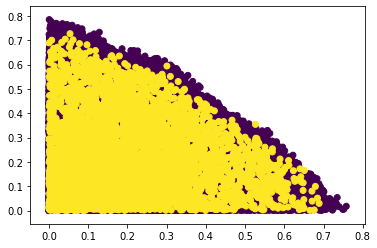

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(new_df_fmatrix[:,0], new_df_fmatrix[:,1], c=new_df['is_validated'].to_numpy())
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
X = new_df_fmatrix
y = new_df['is_validated'].to_numpy()
clf = LogisticRegression(random_state=0).fit(X, y)
pred_prob = clf.predict_proba(X)

In [52]:
pred_prob

array([[0.96493293, 0.03506707],
       [0.95561841, 0.04438159],
       [0.95819882, 0.04180118],
       ...,
       [0.94379736, 0.05620264],
       [0.95088544, 0.04911456],
       [0.95036106, 0.04963894]])

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
def calc_roc_auc(vector_list,label_vector):
    return list(map(lambda x: roc_auc_score(label_vector,x),vector_list))

def calc_roc_fpr_tpr(vector_list,label_vector):
    tuples_to_return = []
    for vector in vector_list:
        fpr,tpr,_ = roc_curve(label_vector, vector)
        tuples_to_return.append((fpr,tpr))
    return tuples_to_return

def draw_roc_curve(vector_list,label_vector,vector_names,sample_source,validation_source):
    fpr_rpr_list = calc_roc_fpr_tpr(vector_list,label_vector)
    auc_list = calc_roc_auc(vector_list,label_vector)
    for i in range(len(vector_list)):
        pyplot.plot(fpr_rpr_list[i][0], fpr_rpr_list[i][1], linestyle='--', label=f'{vector_names[i]} AUC: {auc_list[i]}')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title(f'ROC Curve of {sample_source}, validated against {validation_source}')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

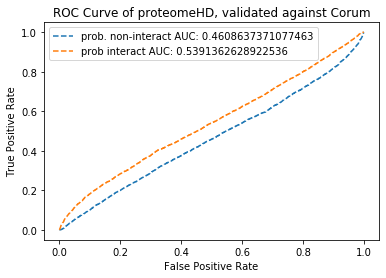

In [55]:
draw_roc_curve([pred_prob[:,0],pred_prob[:,1]],y,["prob. non-interact","prob interact"],"proteomeHD","Corum")